In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore


sns.set(style="whitegrid")
%matplotlib inline

In [14]:
df = pd.read_csv(
    "../data/historical/historical_data.csv",
    skiprows=8,
    parse_dates=["time", "sunrise (iso8601)", "sunset (iso8601)"]
)


df.head()

,location_id,time,temperature_2m_mean (°C),temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_mean (°C),apparent_temperature_min (°C),apparent_temperature_max (°C),wind_speed_10m_max (m/s),wind_gusts_10m_max (m/s),...,et0_fao_evapotranspiration (mm),sunrise (iso8601),sunset (iso8601),daylight_duration (s),sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),weather_code (wmo code)
0,0,2020-01-01,2.1,4.2,-0.7,-3.4,-5.3,-0.4,7.84,13.8,...,1.42,2020-01-01 08:20:00,2020-01-01 17:38:00,33521.89,14262.91,0.0,0.0,0.0,0.0,3
1,0,2020-01-02,2.3,8.8,-2.4,-1.9,-6.6,4.6,4.80,8.7,...,1.12,2020-01-02 08:20:00,2020-01-02 17:39:00,33566.84,25439.16,0.0,0.0,0.0,0.0,3
2,0,2020-01-03,6.3,9.2,2.1,3.8,-1.8,6.9,3.44,5.4,...,0.56,2020-01-03 08:20:00,2020-01-03 17:40:00,33615.52,3947.57,4.0,4.0,0.0,12.0,53
3,0,2020-01-04,7.5,9.9,5.4,5.5,0.4,8.1,6.91,11.5,...,0.29,2020-01-04 08:20:00,2020-01-04 17:41:00,33667.84,0.00,6.2,6.2,0.0,19.0,53
4,0,2020-01-05,2.5,5.0,-1.6,-3.8,-5.6,-1.3,10.29,18.3,...,1.56,2020-01-05 08:20:00,2020-01-05 17:42:00,33723.71,25571.97,0.9,0.9,0.0,3.0,53


In [15]:
df.describe()

,location_id,time,temperature_2m_mean (°C),temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_mean (°C),apparent_temperature_min (°C),apparent_temperature_max (°C),wind_speed_10m_max (m/s),wind_gusts_10m_max (m/s),...,et0_fao_evapotranspiration (mm),sunrise (iso8601),sunset (iso8601),daylight_duration (s),sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),weather_code (wmo code)
count,12036.000000,12036,12035.000000,12036.000000,12036.000000,12035.000000,12036.000000,12036.000000,12036.000000,12036.000000,...,12035.000000,12036,12036,12036.000000,12035.000000,12035.000000,12035.000000,12035.000000,12036.000000,12036.000000
mean,2.500000,2022-09-29 11:59:59.999999744,19.451957,23.937911,15.618162,19.762966,15.533175,24.657586,5.640726,11.077484,...,3.704958,2022-09-29 18:16:33.489531392,2022-09-30 06:26:37.313060864,43804.226637,32895.168211,3.851010,3.805426,0.031932,5.009638,33.151130
min,0.000000,2020-01-01 00:00:00,-12.000000,-8.600000,-17.500000,-18.900000,-24.100000,-13.500000,1.360000,3.100000,...,0.170000,2020-01-01 05:09:00,2020-01-01 16:37:00,29696.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2021-05-16 00:00:00,13.200000,17.900000,9.100000,10.800000,6.300000,15.800000,4.220000,8.900000,...,2.210000,2021-05-16 06:05:30,2021-05-16 18:22:15,40146.467500,28798.245000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,2.500000,2022-09-29 12:00:00,22.400000,26.600000,18.600000,23.200000,18.800000,28.200000,5.300000,10.600000,...,3.810000,2022-09-29 18:36:00,2022-09-30 06:30:30,43654.870000,36819.390000,0.300000,0.300000,0.000000,2.000000,51.000000
75%,4.000000,2024-02-13 00:00:00,26.200000,30.900000,22.700000,29.100000,25.200000,34.200000,6.560000,12.800000,...,5.100000,2024-02-13 06:00:45,2024-02-13 18:27:00,47332.090000,41616.325000,3.400000,3.400000,0.000000,8.000000,55.000000
max,5.000000,2025-06-28 00:00:00,34.600000,41.700000,28.800000,37.300000,33.300000,44.500000,21.120000,31.900000,...,10.750000,2025-06-28 06:47:00,2025-06-28 21:58:00,58228.740000,53024.880000,187.200000,187.200000,27.020000,24.000000,75.000000
std,1.707896,NaN,8.521778,8.909953,8.642226,11.338879,11.444279,11.790160,2.078727,3.272008,...,1.845943,NaN,NaN,5901.066332,12893.968086,9.229585,9.198416,0.502393,6.581267,27.442761


In [58]:
df.dtypes 

location_id                                 int64
timestamp                          datetime64[ns]
temp_C                                    float64
temp_max_C                                float64
temp_min_C                                float64
feels_like_C                              float64
apparent_temperature_min (°C)             float64
apparent_temperature_max (°C)             float64
wind_speed                                float64
wind_gust                                 float64
wind_deg                                  float64
shortwave_radiation_sum (MJ/m²)           float64
et0_fao_evapotranspiration (mm)           float64
sunrise                            datetime64[ns]
sunset                             datetime64[ns]
daylight_duration (s)                     float64
sunshine_duration (s)                     float64
precipitation_sum (mm)                    float64
rain_1d                                   float64
snowfall_sum (cm)                         float64


In [59]:
df[columns_to_fill].isna().all()

pressure              False
humidity              False
cloudiness            False
precipitation_prob    False
dtype: bool

In [83]:
location_map = {
    0: "New York",
    1: "Tokyo",
    2: "Paris",
    3: "Toliara",
    4: "Mahajanga",
    5: "Toamasina"
}
df["city"] = df["location_id"].map(location_map)

df = df.rename(columns={
    "time": "timestamp",
    "sunrise (iso8601)": "sunrise",
    "sunset (iso8601)": "sunset",
    "temperature_2m_mean (°C)": "temp_C",
    "temperature_2m_min (°C)": "temp_min_C",
    "temperature_2m_max (°C)": "temp_max_C",
    "apparent_temperature_mean (°C)": "feels_like_C",
    "wind_speed_10m_max (m/s)": "wind_speed",
    "wind_direction_10m_dominant (°)": "wind_deg",
    "wind_gusts_10m_max (m/s)": "wind_gust",
    "rain_sum (mm)": "rain_1d",
    "weather_code (wmo code)": "weather_code"
})

df["pressure"] = np.nan
df["humidity"] = np.nan
df["cloudiness"] = np.nan
df["precipitation_prob"] = np.nan
df["weather_main"] = df["weather_code"].map({
    0: "Clear", 1: "Mainly clear", 2: "Partly cloudy", 3: "Overcast",
    51: "Light drizzle", 53: "Moderate drizzle", 61: "Light rain",
    71: "Light snow", 73: "Moderate snow"
})
df["weather_description"] = df["weather_main"].str.lower()
df["summary"] = ""
df["extracted_at"] = pd.Timestamp.now()


df["is_ideal_temp"] = df["temp_C"].between(22, 28)
df["is_low_rain"] = df["rain_1d"] == 0
df["is_low_wind"] = df["wind_speed"] < 5
df["is_ideal_humidity"] = True  # Placeholder

df["comfort_score"] = (
    df["is_ideal_temp"].astype(float) * 0.4 +
    df["is_low_rain"].astype(float) * 0.3 +
    df["is_low_wind"].astype(float) * 0.3
)

df["is_ideal_day"] = df["comfort_score"] >= 0.8

df["month"] = df["timestamp"].dt.month_name()
df["year"] = df["timestamp"].dt.year
df["day_of_week"] = df["timestamp"].dt.day_name()

final_columns = [
    "city", "timestamp", "sunrise", "sunset",
    "temp_C", "temp_min_C", "temp_max_C", "feels_like_C",
    "pressure", "humidity", "wind_speed", "wind_deg", "wind_gust",
    "cloudiness", "precipitation_prob", "rain_1d",
    "weather_main", "weather_description", "summary", "extracted_at",
    "is_ideal_temp", "is_low_rain", "is_low_wind", "is_ideal_humidity",
    "comfort_score", "is_ideal_day", "month", "year", "day_of_week"
]

columns_to_fill = ["pressure", "humidity", "cloudiness", "precipitation_prob"]

for col in columns_to_fill:
    if df[col].isna().all():
        df[col] = 0
    else:
        df[col] = df.groupby("city")[col].transform(lambda x: x.fillna(x.median()))
        df[col] = df[col].fillna(0)



df_final = df[final_columns]
df_final.head()


,city,timestamp,sunrise,sunset,temp_C,temp_min_C,temp_max_C,feels_like_C,pressure,humidity,...,extracted_at,is_ideal_temp,is_low_rain,is_low_wind,is_ideal_humidity,comfort_score,is_ideal_day,month,year,day_of_week
0,New York,2020-01-01,2020-01-01 08:20:00,2020-01-01 17:38:00,2.1,-0.7,4.2,-3.4,0,0,...,2025-07-04 13:45:42.057542,False,True,False,True,0.3,False,January,2020,Wednesday
1,New York,2020-01-02,2020-01-02 08:20:00,2020-01-02 17:39:00,2.3,-2.4,8.8,-1.9,0,0,...,2025-07-04 13:45:42.057542,False,True,True,True,0.6,False,January,2020,Thursday
2,New York,2020-01-03,2020-01-03 08:20:00,2020-01-03 17:40:00,6.3,2.1,9.2,3.8,0,0,...,2025-07-04 13:45:42.057542,False,False,True,True,0.3,False,January,2020,Friday
3,New York,2020-01-04,2020-01-04 08:20:00,2020-01-04 17:41:00,7.5,5.4,9.9,5.5,0,0,...,2025-07-04 13:45:42.057542,False,False,False,True,0.0,False,January,2020,Saturday
4,New York,2020-01-05,2020-01-05 08:20:00,2020-01-05 17:42:00,2.5,-1.6,5.0,-3.8,0,0,...,2025-07-04 13:45:42.057542,False,False,False,True,0.0,False,January,2020,Sunday


In [64]:
def plot_negative_distribution(df, column):
    if column not in df.columns:
        print(f"Column '{column}' not found.")
        return

    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], bins=50, kde=True, color="lightblue", label="All values")

    # Overlay negative values
    neg_values = df[df[column] < 0]
    if not neg_values.empty:
        sns.histplot(neg_values[column], bins=30, color="red", label="Negative values")

    plt.title(f"Distribution of '{column}' with Negative Values Highlighted")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_outlier_distribution(df, column, threshold=4):
    if column not in df.columns:
        print(f"Column '{column}' not found.")
        return

    values = df[column].dropna()
    z_scores = zscore(values)
    outliers = values[z_scores > threshold]

    plt.figure(figsize=(10, 5))
    sns.histplot(values, bins=50, kde=True, color="lightgreen", label="All values")

    if not outliers.empty:
        sns.histplot(outliers, bins=30, color="orange", label=f"Outliers (z > {threshold})")

    plt.title(f"Distribution of '{column}' with Outliers Highlighted")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()


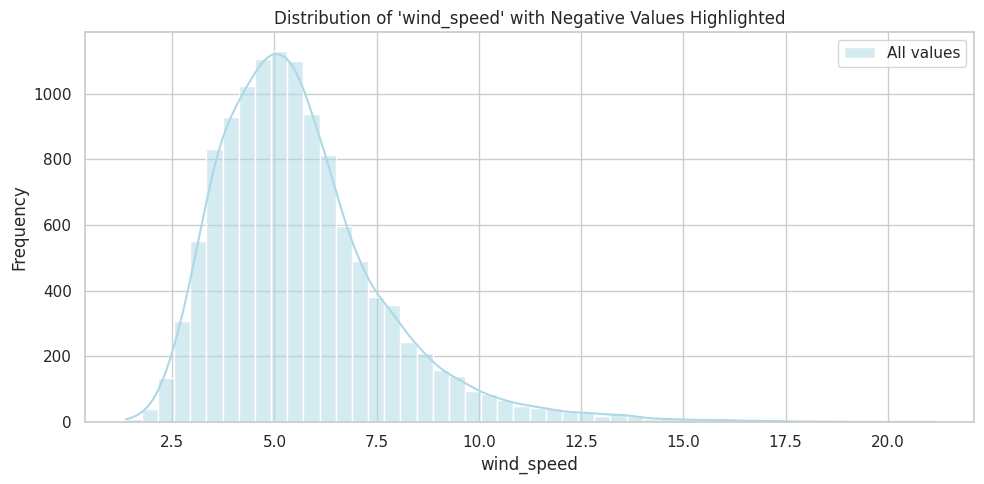

In [85]:
plot_negative_distribution(df_final, "wind_speed")


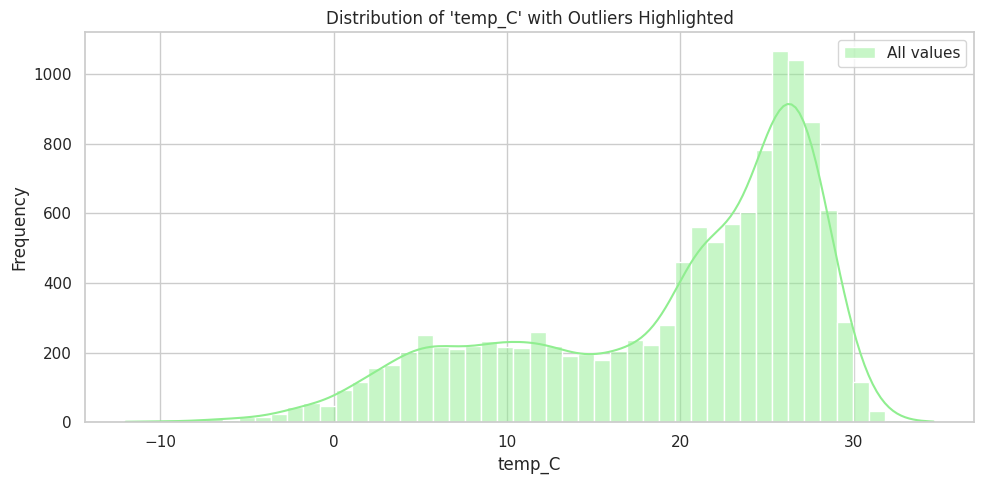

In [86]:

plot_outlier_distribution(df_final, "temp_C")

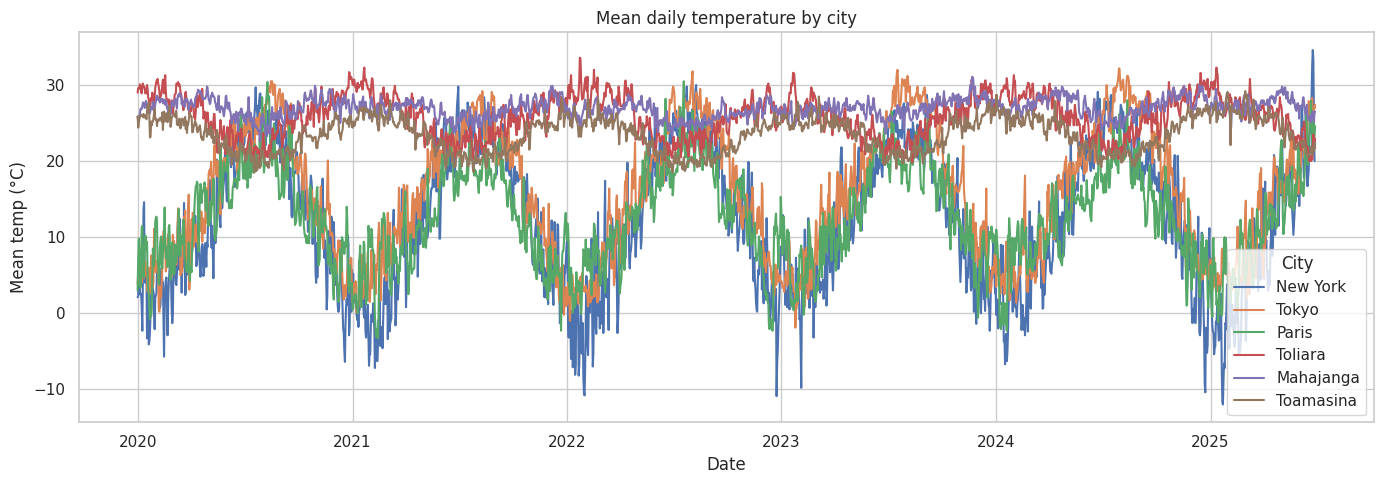

In [88]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=df_final, x="timestamp", y="temp_C", hue="city")
plt.title("Mean daily temperature by city")
plt.xlabel("Date")
plt.ylabel("Mean temp (°C)")
plt.legend(title="City")
plt.tight_layout()
plt.show()


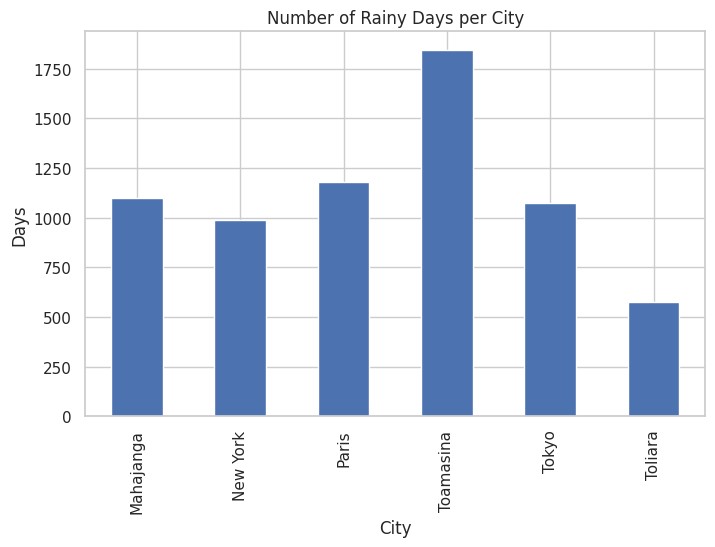

In [87]:
rainy_days = df_final[df_final["rain_1d"] > 0].groupby("city")["timestamp"].count()
rainy_days.plot(kind="bar", title="Number of Rainy Days per City", ylabel="Days", xlabel="City", figsize=(8, 5))
plt.show()

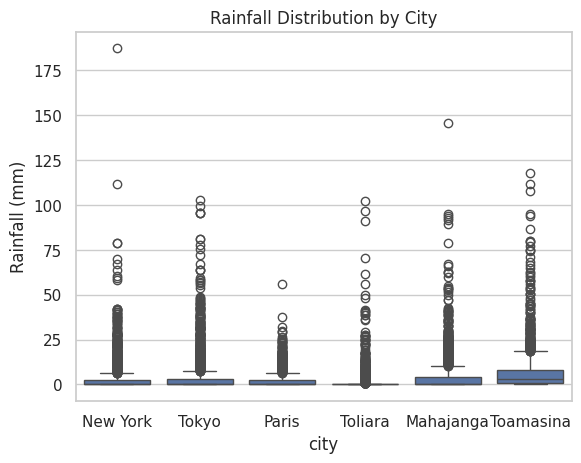

In [89]:
sns.boxplot(data=df_final, x="city", y="rain_1d")
plt.title("Rainfall Distribution by City")
plt.ylabel("Rainfall (mm)")
plt.show()


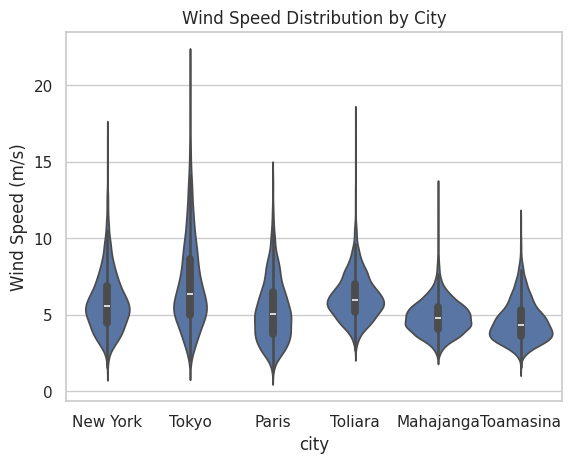

In [90]:
sns.violinplot(data=df_final, x="city", y="wind_speed")
plt.title("Wind Speed Distribution by City")
plt.ylabel("Wind Speed (m/s)")
plt.show()

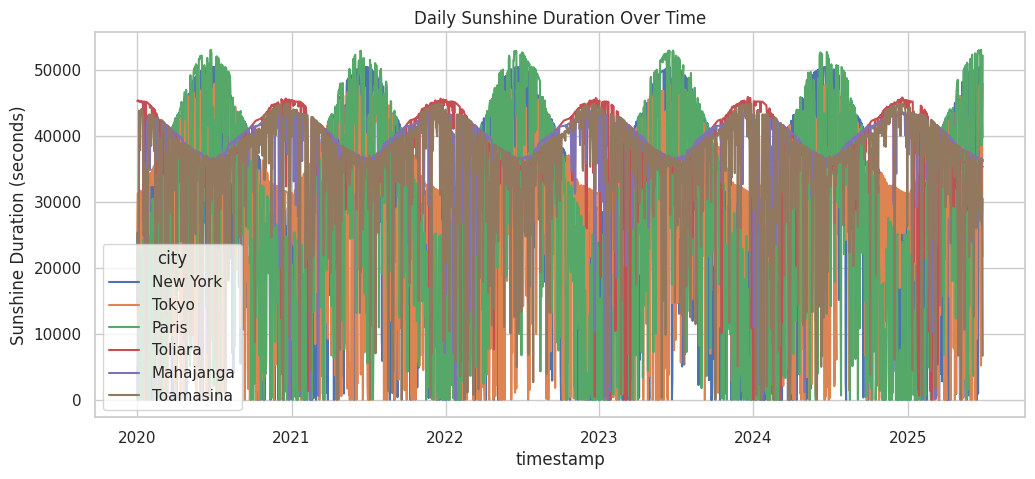

In [44]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="timestamp", y="sunshine_duration (s)", hue="city")
plt.title("Daily Sunshine Duration Over Time")
plt.ylabel("Sunshine Duration (seconds)")
plt.show()

/tmp/ipykernel_71920/2654707402.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="City")


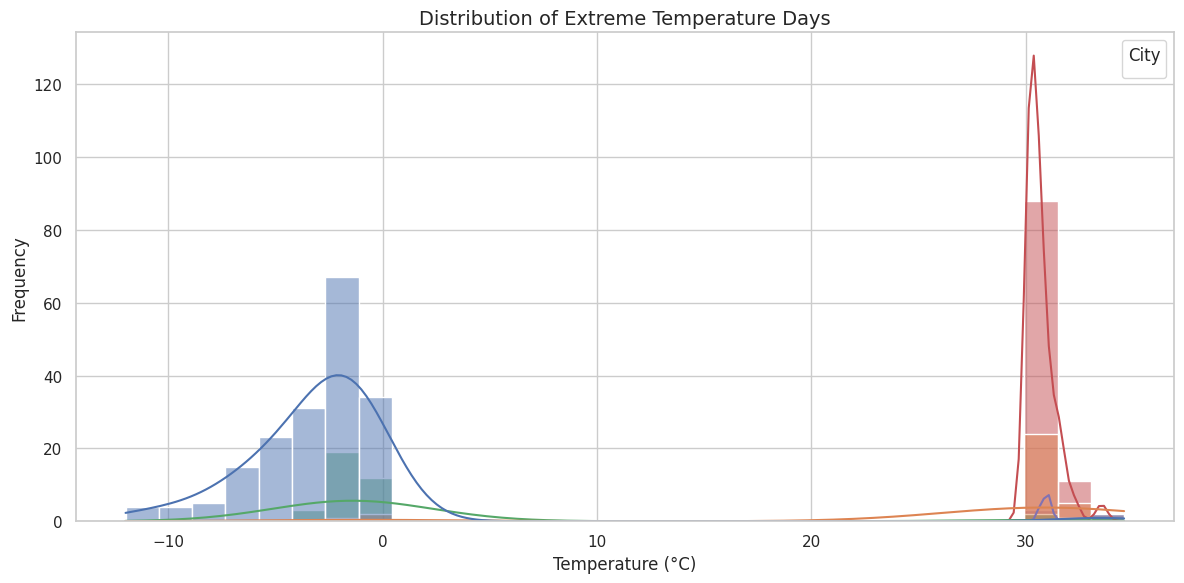

In [91]:
extreme_days = df_final[(df_final["temp_C"] > 30) | (df["temp_C"] < 0)]
plt.figure(figsize=(12, 6))
sns.histplot(data=extreme_days, x="temp_C", hue="city", bins=30, kde=True)
plt.title("Distribution of Extreme Temperature Days", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="City")
plt.tight_layout()
plt.show()


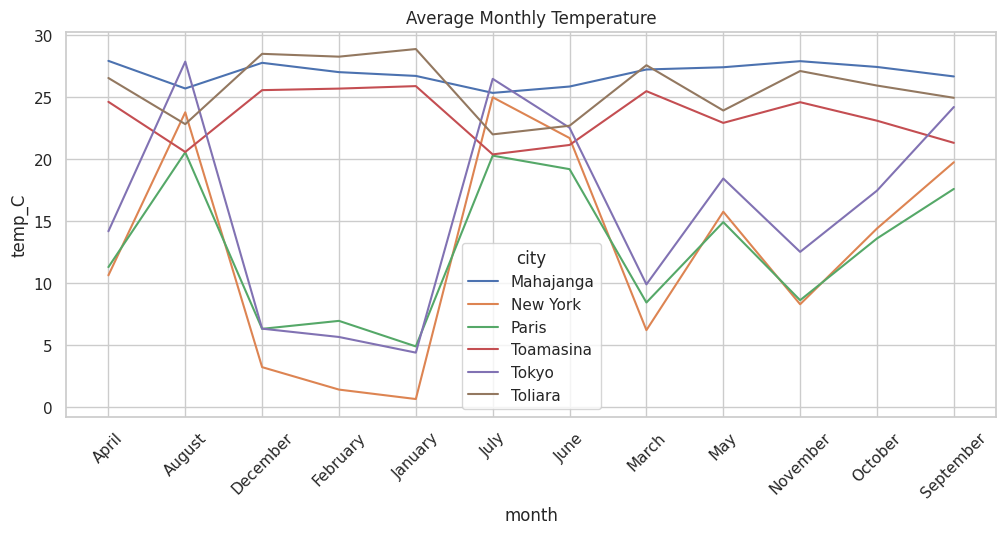

In [92]:
df["month"] = df_final["timestamp"].dt.month_name()
monthly_avg = df_final.groupby(["city", "month"])[["temp_C", "rain_1d"]].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_avg, x="month", y="temp_C", hue="city")
plt.title("Average Monthly Temperature")
plt.xticks(rotation=45)
plt.show()


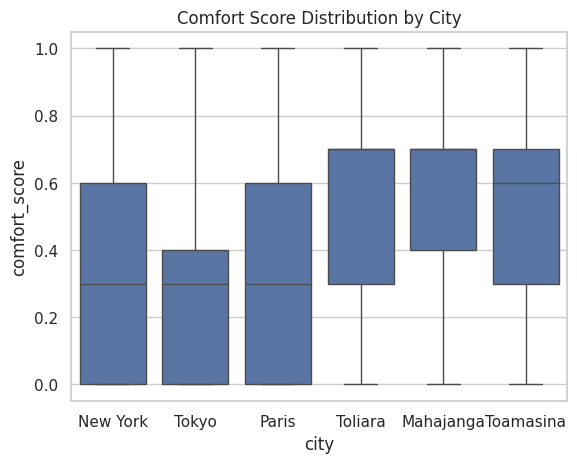

In [53]:
sns.boxplot(data=df, x="city", y="comfort_score")
plt.title("Comfort Score Distribution by City")
plt.show()


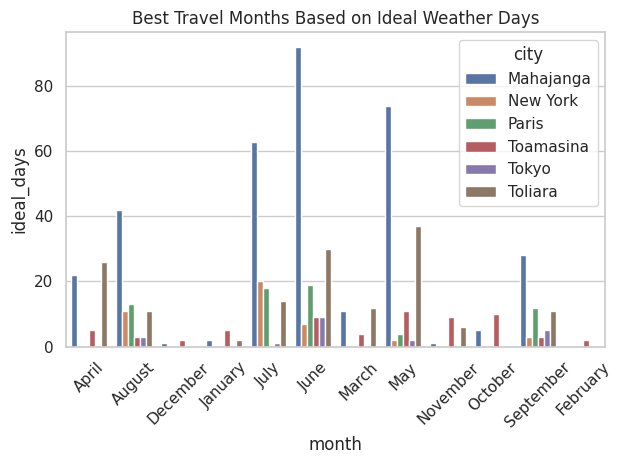

In [93]:
best_season = df_final[df_final["is_ideal_day"]].groupby(["city", "month"]).size().reset_index(name="ideal_days")
sns.barplot(data=best_season, x="month", y="ideal_days", hue="city")
plt.title("Best Travel Months Based on Ideal Weather Days")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [94]:
df_final.head()

,city,timestamp,sunrise,sunset,temp_C,temp_min_C,temp_max_C,feels_like_C,pressure,humidity,...,extracted_at,is_ideal_temp,is_low_rain,is_low_wind,is_ideal_humidity,comfort_score,is_ideal_day,month,year,day_of_week
0,New York,2020-01-01,2020-01-01 08:20:00,2020-01-01 17:38:00,2.1,-0.7,4.2,-3.4,0,0,...,2025-07-04 13:45:42.057542,False,True,False,True,0.3,False,January,2020,Wednesday
1,New York,2020-01-02,2020-01-02 08:20:00,2020-01-02 17:39:00,2.3,-2.4,8.8,-1.9,0,0,...,2025-07-04 13:45:42.057542,False,True,True,True,0.6,False,January,2020,Thursday
2,New York,2020-01-03,2020-01-03 08:20:00,2020-01-03 17:40:00,6.3,2.1,9.2,3.8,0,0,...,2025-07-04 13:45:42.057542,False,False,True,True,0.3,False,January,2020,Friday
3,New York,2020-01-04,2020-01-04 08:20:00,2020-01-04 17:41:00,7.5,5.4,9.9,5.5,0,0,...,2025-07-04 13:45:42.057542,False,False,False,True,0.0,False,January,2020,Saturday
4,New York,2020-01-05,2020-01-05 08:20:00,2020-01-05 17:42:00,2.5,-1.6,5.0,-3.8,0,0,...,2025-07-04 13:45:42.057542,False,False,False,True,0.0,False,January,2020,Sunday


In [95]:
df_final.to_csv("../data/historical/cleaned_historical_data.csv", index=False)

import os

file_path = "../data/historical/cleaned_historical_data.csv"
if os.path.exists(file_path):
    print("✅ File saved successfully!")
else:
    print("❌ Save failed.")


✅ File saved successfully!
